# Pilot Analyses -- Psifr Edition

## Setup

In [1]:
#%% Dependencies

from helpers import export_to_psifr_long_table
from helpers import load_data
from psifr import fr
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
# %% Load data
embam_data_path = "data/pooled_raw_data.h5"
embam_data = load_data(embam_data_path)
events = export_to_psifr_long_table(embam_data)
events.head()


FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'data/pooled_raw_data.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
# %% Merge study and recall events
data = fr.merge_free_recall(
    events,
    list_keys=['condition', 'target_success', 'listLength', 'trial_category_cue', 'category']
)
data.head()


,subject,list,item,input,output,study,recall,repeat,intrusion,condition,target_success,listLength,trial_category_cue,category,prior_list,prior_input
0,0,1,19,11,6.0,True,True,0,False,0,False,12,0,1,NaN,NaN
1,0,1,34,4,NaN,True,False,0,False,0,False,12,0,2,NaN,NaN
2,0,1,60,12,NaN,True,False,0,False,0,False,12,0,4,NaN,NaN
3,0,1,136,8,3.0,True,True,0,False,0,False,12,0,8,NaN,NaN
4,0,1,158,10,5.0,True,True,0,False,0,False,12,0,9,NaN,NaN


## Demo Analyses

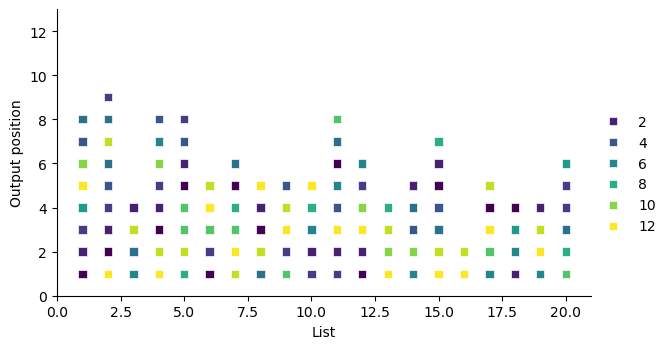

In [ ]:
# %% Raster Plot
subj = fr.filter_data(data, 1)
g = fr.plot_raster(subj).add_legend()

,subject,input,recall,condition
0,0,1,0.750,control
1,0,2,0.875,control
2,0,3,0.875,control
3,0,4,0.750,control
4,0,5,0.875,control
...,...,...,...,...
115,9,8,0.600,success
116,9,9,0.700,success
117,9,10,0.700,success
118,9,11,0.400,success


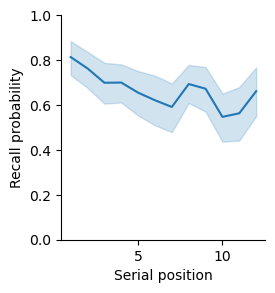

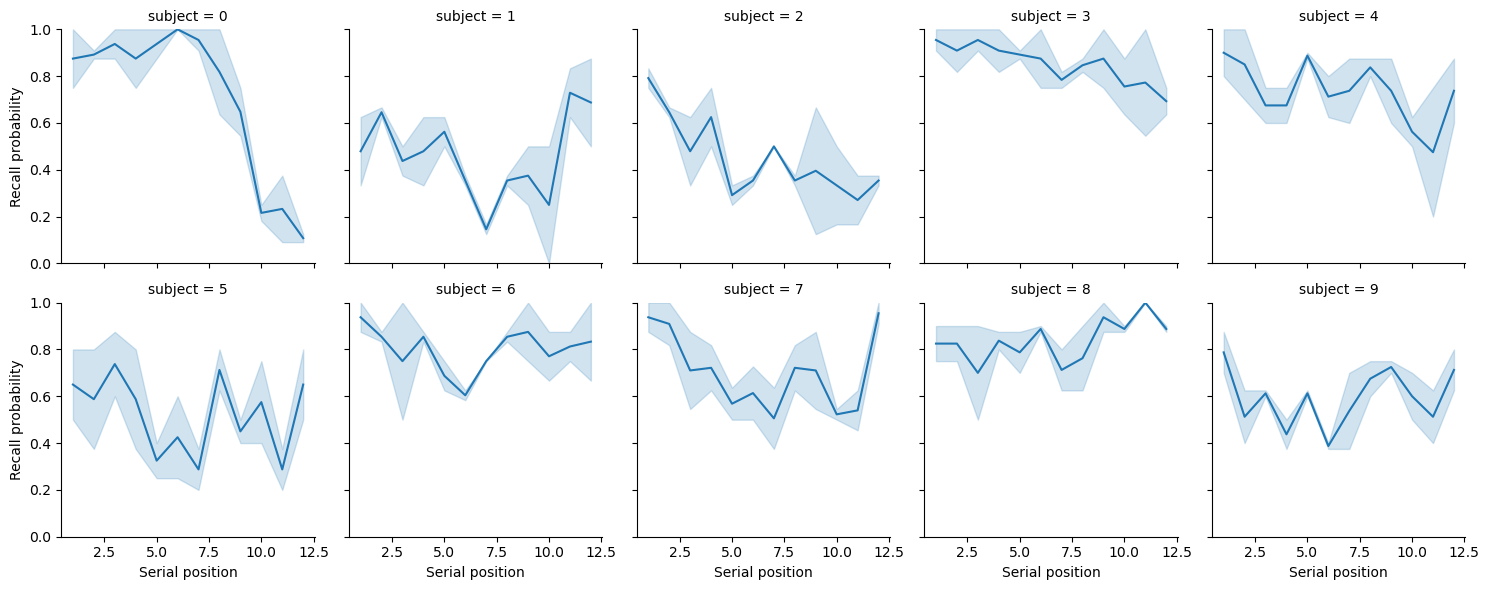

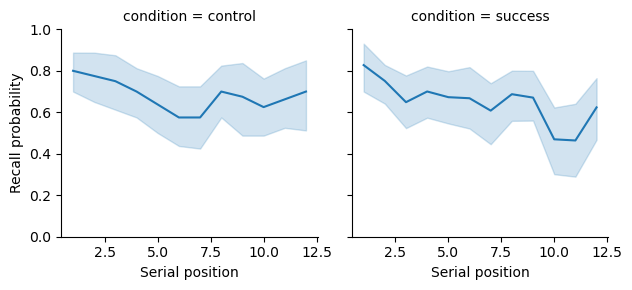

In [ ]:
# %% SPC
spc_control = fr.spc(data.query('condition == 0'))
spc_success = fr.spc(data.query('condition == 2'))
spc = pd.concat([spc_control.assign(condition='control'), spc_success.assign(condition='success')])

g = fr.plot_spc(spc)
g = fr.plot_spc(spc, col='subject', col_wrap=5)
g = fr.plot_spc(spc, col='condition', col_wrap=5)

spc

,subject,output,input,prob,actual,possible,condition
0,0,1,1,0.625,5,8,control
1,0,1,2,0.125,1,8,control
2,0,1,3,0.000,0,8,control
3,0,1,4,0.000,0,8,control
4,0,1,5,0.000,0,8,control
...,...,...,...,...,...,...,...
1291,9,12,8,NaN,0,0,failure
1292,9,12,9,NaN,0,0,failure
1293,9,12,10,NaN,0,0,failure
1294,9,12,11,NaN,0,0,failure


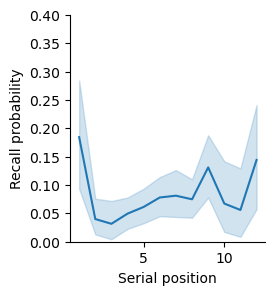

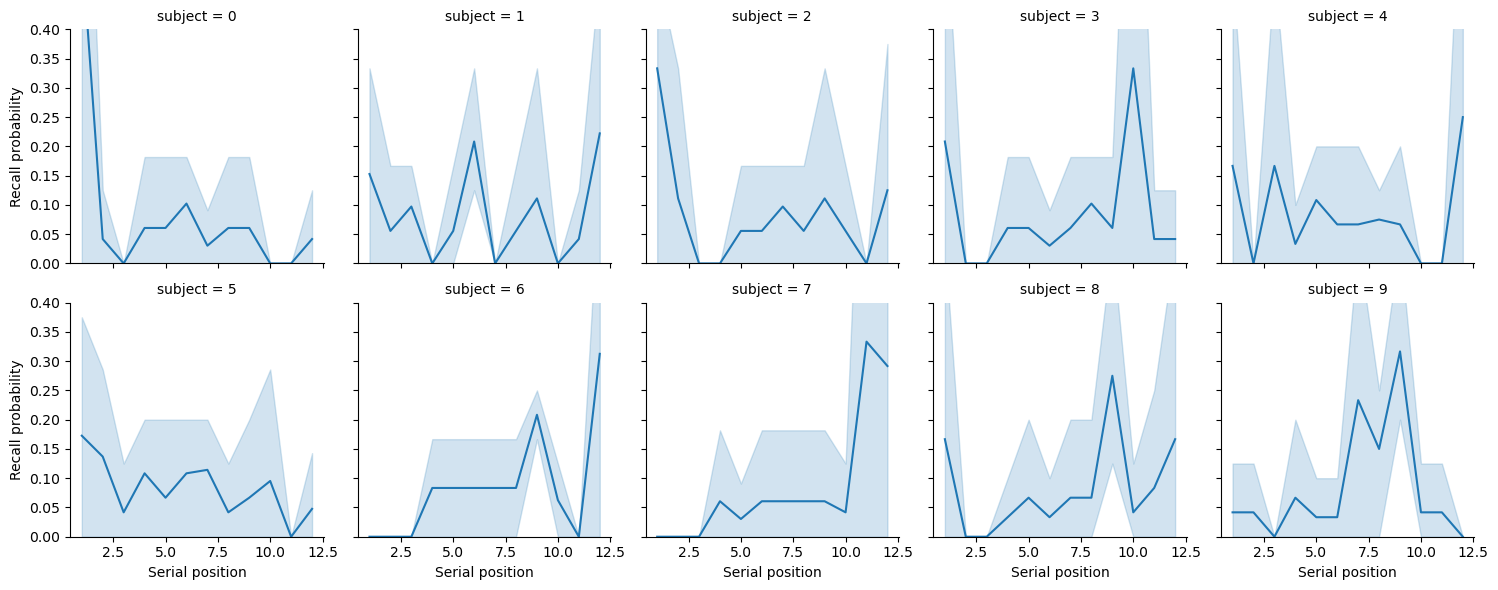

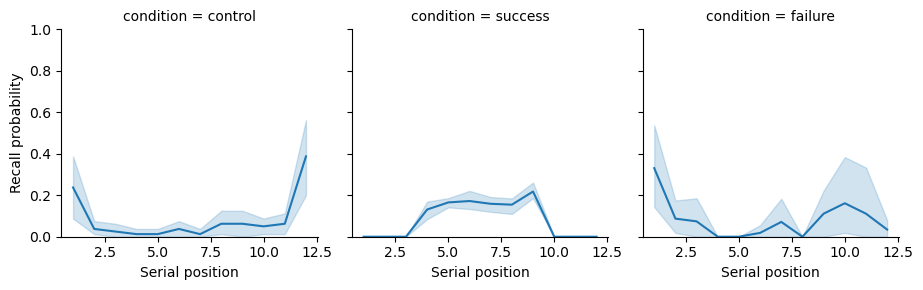

In [ ]:
# %% PFR

pnr_control = fr.pnr(data.query('condition == 0'))
pnr_success = fr.pnr(data.query('condition == 2'))
pnr_attempt = fr.pnr(data.query('condition == 1'))
pnr = pd.concat([pnr_control.assign(condition='control'), pnr_success.assign(condition='success'), pnr_attempt.assign(condition='failure')])

pfr = pnr.query('output <= 1')
g = fr.plot_spc(pfr)
plt.ylim([0, .4])
g = fr.plot_spc(pfr, col='subject', col_wrap=5)
plt.ylim([0, .4])
g = fr.plot_spc(pfr, col='condition', col_wrap=5)
pnr

,subject,output,input,prob,actual,possible,condition
0,0,1,1,0.625,5,8,control
1,0,1,2,0.125,1,8,control
2,0,1,3,0.000,0,8,control
3,0,1,4,0.000,0,8,control
4,0,1,5,0.000,0,8,control
...,...,...,...,...,...,...,...
1291,9,12,8,NaN,0,0,failure
1292,9,12,9,NaN,0,0,failure
1293,9,12,10,NaN,0,0,failure
1294,9,12,11,NaN,0,0,failure


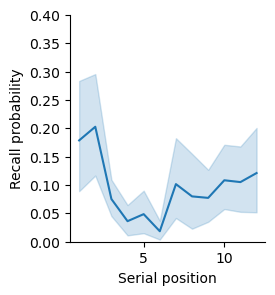

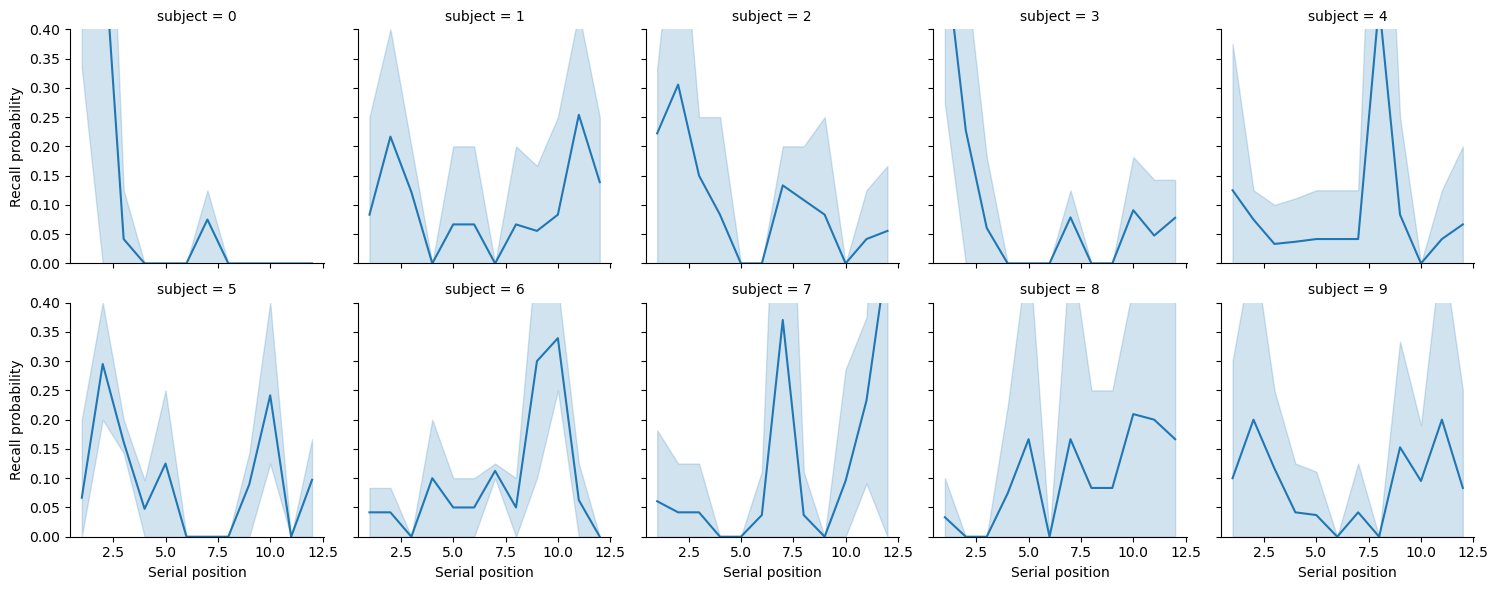

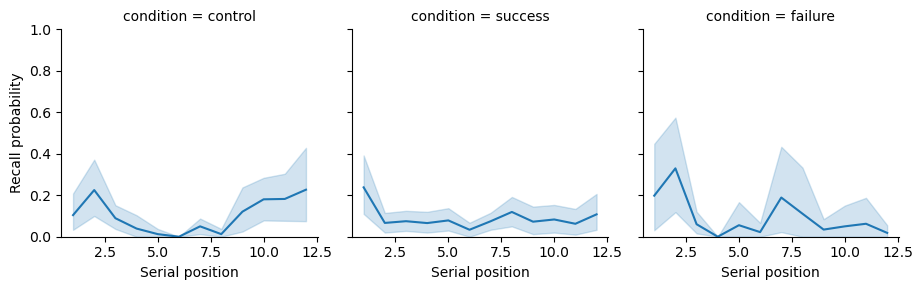

In [ ]:
# %% P2R

pnr_control = fr.pnr(data.query('condition == 0'))
pnr_success = fr.pnr(data.query('condition == 2'))
pnr_attempt = fr.pnr(data.query('condition == 1'))
pnr = pd.concat([pnr_control.assign(condition='control'), pnr_success.assign(condition='success'), pnr_attempt.assign(condition='failure')])

pfr = pnr.query('output == 2')
g = fr.plot_spc(pfr)
plt.ylim([0, .4])
g = fr.plot_spc(pfr, col='subject', col_wrap=5)
plt.ylim([0, .4])
g = fr.plot_spc(pfr, col='condition', col_wrap=5)
pnr

,subject,lag,prob,actual,possible,condition
0,0,-11,1.0,1,1,control
1,0,-10,0.0,0,1,control
2,0,-9,0.0,0,3,control
3,0,-8,0.0,0,4,control
4,0,-7,0.0,0,5,control
...,...,...,...,...,...,...
202,9,7,0.0,0,3,failure
203,9,8,0.5,1,2,failure
204,9,9,0.0,0,2,failure
205,9,10,0.0,0,1,failure


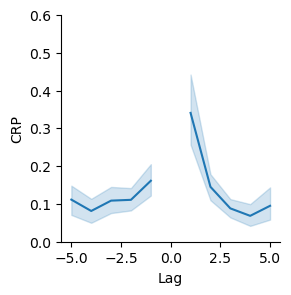

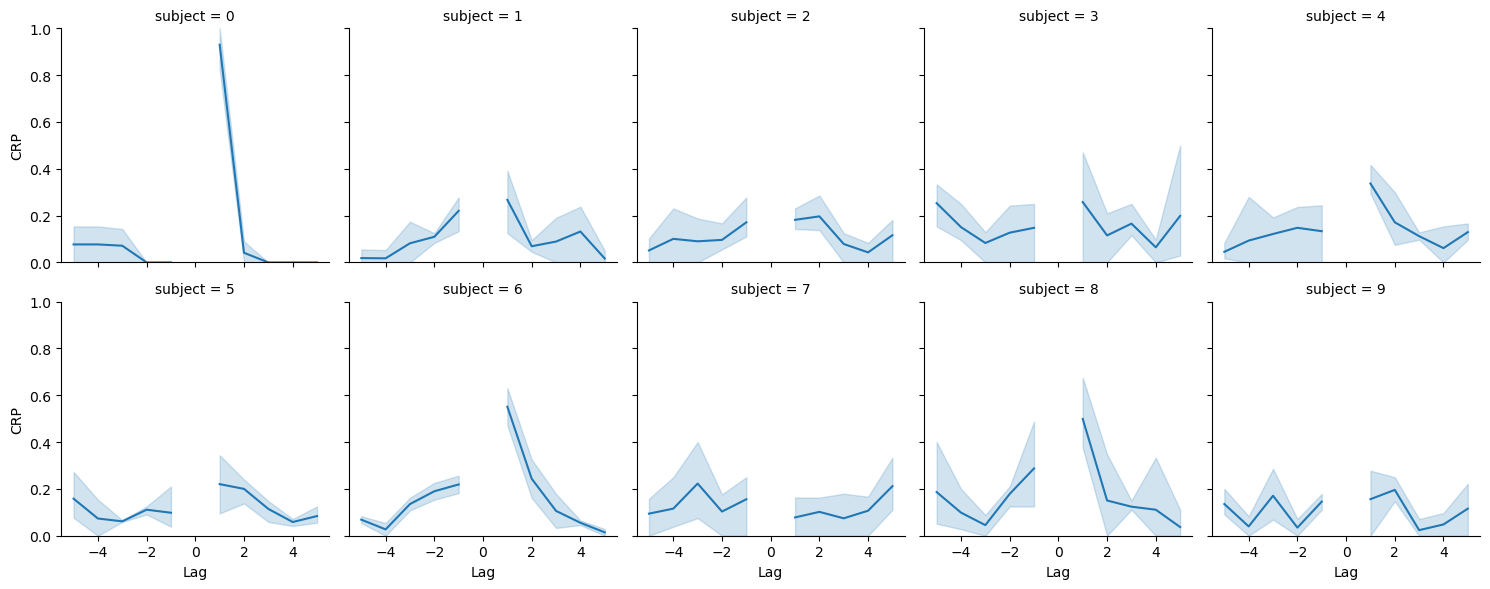

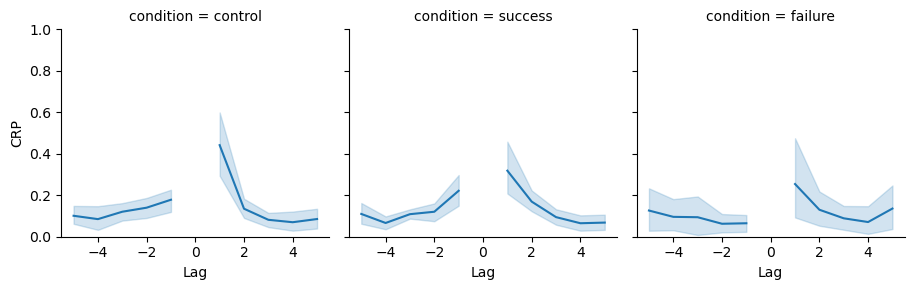

In [ ]:
# %% Lag-CRP

crp_control = fr.lag_crp(data.query('condition == 0'))
crp_success = fr.lag_crp(data.query('condition == 2'))
crp_attempt = fr.lag_crp(data.query('condition == 1'))
lag_crp = pd.concat([crp_control.assign(condition='control'), crp_success.assign(condition='success'), crp_attempt.assign(condition='failure')])

# lag_crp = fr.lag_crp(data)
g = fr.plot_lag_crp(lag_crp)
plt.ylim([0, .6])
g = fr.plot_lag_crp(lag_crp, col='subject', col_wrap=5)
#plt.ylim([0, .6])
g = fr.plot_lag_crp(lag_crp, col='condition', col_wrap=5)
lag_crp

In [ ]:
# %% Lag-Rank Analysis
ranks_control = fr.lag_rank(data.query('condition == 0'))
ranks_success = fr.lag_rank(data.query('condition == 2'))
ranks_attempt = fr.lag_rank(data.query('condition == 1'))
ranks = pd.concat([ranks_control.assign(condition='control'), ranks_success.assign(condition='success'), ranks_attempt.assign(condition='failure')])

print("control")
print(ranks_control.agg(['mean', 'sem'])['rank'])
print("success")
print(ranks_success.agg(['mean', 'sem'])['rank'])
print("failure")
print(ranks_attempt.agg(['mean', 'sem'])['rank'])
ranks

control
mean    0.668121
sem     0.040052
Name: rank, dtype: float64
success
mean    0.631613
sem     0.039276
Name: rank, dtype: float64
failure
mean    0.563318
sem     0.067162
Name: rank, dtype: float64


,subject,rank,condition
0,0,0.969563,control
1,1,0.632257,control
2,2,0.597586,control
3,3,0.650929,control
4,4,0.610108,control
5,5,0.591651,control
6,6,0.746043,control
7,7,0.556818,control
8,8,0.761175,control
9,9,0.565083,control


## How Often Do Subjects Recall the Category Target?

In [ ]:
# %% Focus on targetting trials, then aggregating target_success by subject
success_rates = data.query('condition > 0').pivot_table(
    index='subject', values='target_success', aggfunc='mean')

# mean and sem over subjects
print(success_rates.agg(['mean', 'sem'])['target_success'])
success_rates

mean    0.76758
sem     0.06684
Name: target_success, dtype: float64


,target_success
subject,
0,0.918367
1,0.500000
2,0.496599
3,0.914474
4,0.834483
5,0.417808
6,1.000000
7,0.913580
8,0.843750


## Focusing on Transitions From Category Targets

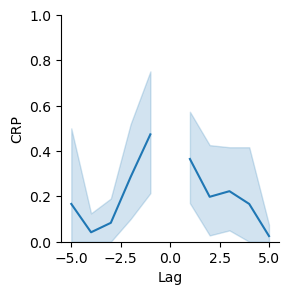

,subject,lag,prob,actual,possible,condition
0,0,-11,1.0,1,1,control
1,0,-10,NaN,0,0,control
2,0,-9,NaN,0,0,control
3,0,-8,0.0,0,1,control
4,0,-7,NaN,0,0,control
...,...,...,...,...,...,...
202,9,7,NaN,0,0,failure
203,9,8,NaN,0,0,failure
204,9,9,NaN,0,0,failure
205,9,10,NaN,0,0,failure


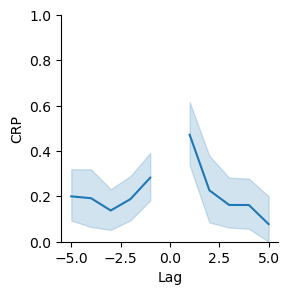

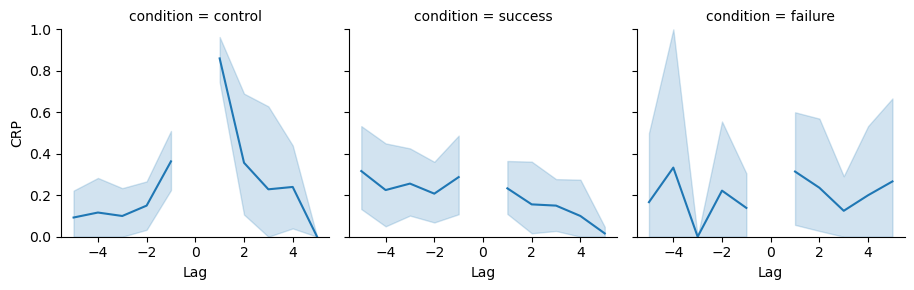

In [ ]:
# %% First Transition Lag-CRP
crp_control = fr.lag_crp(data.query('condition == 0'), item_query='output < 3 or not recall')
crp_success = fr.lag_crp(data.query('condition == 2'), item_query='output < 3 or not recall')
crp_attempt = fr.lag_crp(data.query('condition == 1'), item_query='output < 3 or not recall')
lag_crp = pd.concat([crp_control.assign(condition='control'), crp_success.assign(condition='success'), crp_attempt.assign(condition='failure')])

g = fr.plot_lag_crp(lag_crp)
g = fr.plot_lag_crp(lag_crp, col='condition', col_wrap=5)
lag_crp

In [ ]:
#! code-summary: added query to exclude transitiosn to first item in the list in our condition==2
crp_success = fr.lag_crp(data.query('condition == 2'), item_query='(output < 3 or not recall) and input > 2')
g = fr.plot_lag_crp(crp_success)


In [ ]:
# %% First Transition Lag-Rank

ranks_control = fr.lag_rank(data.query('condition == 0'), item_query='output < 3 or not recall')
ranks_success = fr.lag_rank(data.query('condition == 2'), item_query='output < 3 or not recall')
ranks_attempt = fr.lag_rank(data.query('condition == 1'), item_query='output < 3 or not recall')

print("control")
print(ranks_control.agg(['mean', 'sem'])['rank'])
print("success")
print(ranks_success.agg(['mean', 'sem'])['rank'])
print("failure")
print(ranks_attempt.agg(['mean', 'sem'])['rank'])

ranks_success

control
mean    0.780509
sem     0.042851
Name: rank, dtype: float64
success
mean    0.488657
sem     0.049588
Name: rank, dtype: float64
failure
mean    0.554029
sem     0.100665
Name: rank, dtype: float64


,subject,rank
0,0,0.365000
1,1,0.408631
2,2,0.373148
3,3,0.570833
4,4,0.615000
5,5,0.616667
6,6,0.755417
7,7,0.252706
8,8,0.562500
9,9,0.366667


## Modification: Ignore Transitions to First Item from Category Targets

,subject,lag,prob,actual,possible,condition
0,0,-11,NaN,0,0,control
1,0,-10,NaN,0,0,control
2,0,-9,NaN,0,0,control
3,0,-8,NaN,0,0,control
4,0,-7,NaN,0,0,control
...,...,...,...,...,...,...
202,9,7,NaN,0,0,failure
203,9,8,NaN,0,0,failure
204,9,9,NaN,0,0,failure
205,9,10,NaN,0,0,failure


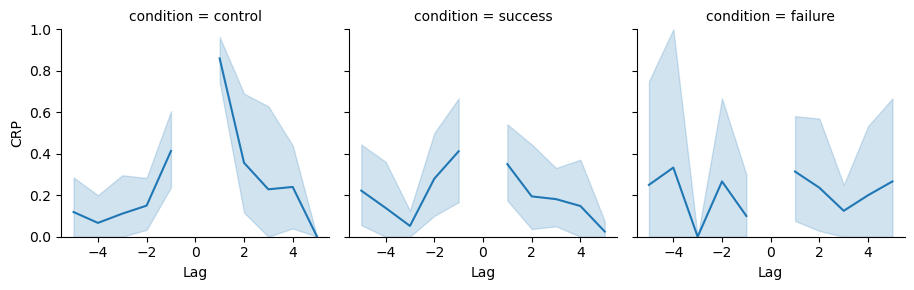

In [ ]:
crp_control = fr.lag_crp(
    data.query('condition == 0'), 
    item_query='output < 3 or not recall',
    test_key='input', test=lambda x, y: y > 1
)
crp_success = fr.lag_crp(
    data.query('condition == 2'), 
    item_query='output < 3 or not recall',
    test_key='input', test=lambda x, y: y > 1
)
crp_attempt = fr.lag_crp(
    data.query('condition == 1'),
    item_query='output < 3 or not recall',
    test_key='input', test=lambda x, y: y > 1
)
lag_crp = pd.concat([crp_control.assign(condition='control'), crp_success.assign(condition='success'), crp_attempt.assign(condition='failure')])

# g = fr.plot_lag_crp(lag_crp)
g = fr.plot_lag_crp(lag_crp, col='condition', col_wrap=5)
lag_crp

In [ ]:
ranks_control = fr.lag_rank(
    data.query('condition == 0'), 
    item_query='output < 3 or not recall',
    test_key='input', test=lambda x, y: y > 1
)
ranks_success = fr.lag_rank(
    data.query('condition == 2'), 
    item_query='output < 3 or not recall',
    test_key='input', test=lambda x, y: y > 1
)
ranks_attempt = fr.lag_rank(
    data.query('condition == 1'),
    item_query='output < 3 or not recall',
    test_key='input', test=lambda x, y: y > 1
)
ranks = pd.concat([ranks_control.assign(condition='control'), ranks_success.assign(condition='success'), ranks_attempt.assign(condition='failure')])

print("control")
print(ranks_control.agg(['mean', 'sem'])['rank'])
print("success")
print(ranks_success.agg(['mean', 'sem'])['rank'])
print("failure")
print(ranks_attempt.agg(['mean', 'sem'])['rank'])

ranks_success

control
mean    0.823807
sem     0.041785
Name: rank, dtype: float64
success
mean    0.565263
sem     0.064055
Name: rank, dtype: float64
failure
mean    0.626977
sem     0.083278
Name: rank, dtype: float64


/opt/homebrew/Caskroom/miniforge/base/envs/online_experiments/lib/python3.12/site-packages/psifr/measures.py:238: RuntimeWarning: Mean of empty slice
  {'subject': subject, 'rank': np.nanmean(ranks)}, index=[subject]
/opt/homebrew/Caskroom/miniforge/base/envs/online_experiments/lib/python3.12/site-packages/psifr/measures.py:238: RuntimeWarning: Mean of empty slice
  {'subject': subject, 'rank': np.nanmean(ranks)}, index=[subject]


,subject,rank
0,0,NaN
1,1,0.385317
2,2,0.559722
3,3,0.682292
4,4,0.607857
5,5,0.704167
6,6,0.776852
7,7,0.211640
8,8,0.750000
9,9,0.409524


## Focusing on Transitions from Mid-Sequence Items

,subject,lag,prob,actual,possible,condition
0,0,-11,NaN,0,0,control
1,0,-10,NaN,0,0,control
2,0,-9,NaN,0,0,control
3,0,-8,0.0,0,2,control
4,0,-7,0.0,0,3,control
...,...,...,...,...,...,...
202,9,7,0.0,0,1,failure
203,9,8,0.0,0,1,failure
204,9,9,NaN,0,0,failure
205,9,10,NaN,0,0,failure


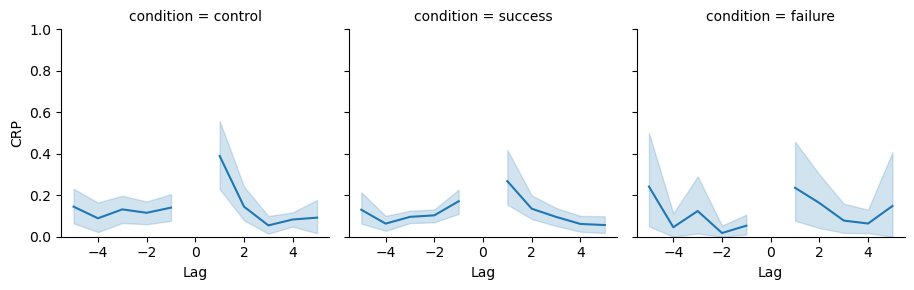

In [ ]:
# %% From Mid-List Transition Lag-CRP
crp_control = fr.lag_crp(
    data.query('condition == 0'), 
    test_key='input', test=lambda x, y: 4 <= x <= 9
)
crp_success = fr.lag_crp(
    data.query('condition == 2'), 
    test_key='input', test=lambda x, y: 4 <= x <= 9
)
crp_attempt = fr.lag_crp(
    data.query('condition == 1'),
    test_key='input', test=lambda x, y: 4 <= x <= 9
)
lag_crp = pd.concat([crp_control.assign(condition='control'), crp_success.assign(condition='success'), crp_attempt.assign(condition='failure')])
# g = fr.plot_lag_crp(lag_crp)
g = fr.plot_lag_crp(lag_crp, col='condition', col_wrap=5)
lag_crp

In [ ]:
# %% From-Mid-List Transition Lag-Rank

ranks_control = fr.lag_rank(data.query('condition == 0'), 
    test_key='input', test=lambda x, y: 4 <= x <= 9
)
ranks_success = fr.lag_rank(data.query('condition == 2'), 
    test_key='input', test=lambda x, y: 4 <= x <= 9
)
ranks_attempt = fr.lag_rank(data.query('condition == 1'), 
    test_key='input', test=lambda x, y: 4 <= x <= 9
)

print("control")
print(ranks_control.agg(['mean', 'sem'])['rank'])
print("success")
print(ranks_success.agg(['mean', 'sem'])['rank'])
print("failure")
print(ranks_attempt.agg(['mean', 'sem'])['rank'])

ranks_success

control
mean    0.606177
sem     0.048530
Name: rank, dtype: float64
success
mean    0.589266
sem     0.041762
Name: rank, dtype: float64
failure
mean    0.508815
sem     0.083305
Name: rank, dtype: float64


,subject,rank
0,0,0.791558
1,1,0.505972
2,2,0.360998
3,3,0.651061
4,4,0.631542
5,5,0.549093
6,6,0.639623
7,7,0.467551
8,8,0.760795
9,9,0.534462


In [ ]:
# %% Comparison: From-Early-Or-Late-List Transition Lag-Rank

ranks_control = fr.lag_rank(data.query('condition == 0'), 
    test_key='input', test=lambda x, y: (x < 4) or (x > 9)
)
ranks_success = fr.lag_rank(data.query('condition == 2'), 
    test_key='input', test=lambda x, y: (x < 4) or (x > 9)
)
ranks_attempt = fr.lag_rank(data.query('condition == 1'), 
    test_key='input', test=lambda x, y: (x < 4) or (x > 9)
)

print("control")
print(ranks_control.agg(['mean', 'sem'])['rank'])
print("success")
print(ranks_success.agg(['mean', 'sem'])['rank'])
print("failure")
print(ranks_attempt.agg(['mean', 'sem'])['rank'])

ranks_success

control
mean    0.712732
sem     0.036718
Name: rank, dtype: float64
success
mean    0.676383
sem     0.040791
Name: rank, dtype: float64
failure
mean    0.603812
sem     0.062667
Name: rank, dtype: float64


,subject,rank
0,0,0.952183
1,1,0.512235
2,2,0.597132
3,3,0.673801
4,4,0.682116
5,5,0.650439
6,6,0.735853
7,7,0.641904
8,8,0.790274
9,9,0.527897
